# importation et la lecture du fichier

In [1]:
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score, GridSearchCV, learning_curve
from sklearn.metrics import f1_score, confusion_matrix, classification_report, plot_confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier


data=pd.read_csv('Shill Bidding Dataset.csv')

# Target et features.

In [2]:
y = data['Class'].values #target
# on suprime Successive_Outbidding car elles est corrolaire avec la variable class
X = data.drop(['Class','Record_ID','Auction_ID','Bidder_ID',"Successive_Outbidding"],axis=1).values #features

# Affichage la destribution des données

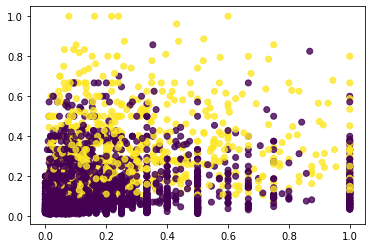

In [3]:
plt.scatter(X[:,0],X[:,1], c=y,alpha=0.8 )

# Découpage DataSet en training testing set.

In [4]:
# stratify : pour équilibrer la portion d'exemple de deux class 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=0, stratify=y)
                                                        
print("train-set size: ", len(y_train),
      "\ntest-set size: ", len(y_test))

print("X ", len(X_train),
      "X test: ", len(X_test))
print("fraud cases in test-set: ", sum(y_test))

train-set size:  5056 
test-set size:  1265
X  5056 X test:  1265
fraud cases in test-set:  135


# Affichage la destribution de training et testing set

Text(0.5, 1.0, 'test set')

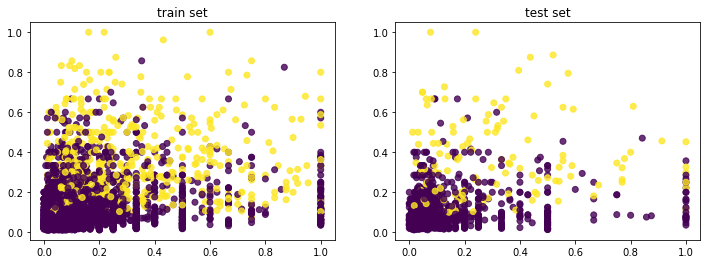

In [5]:
plt.figure(figsize=(12,4))
plt.subplot(121)
plt.scatter(X_train[:,0],X_train[:,1], c=y_train,alpha=0.8 )
plt.title('train set')
plt.subplot(122)
plt.scatter(X_test[:,0],X_test[:,1], c=y_test,alpha=0.8 )
plt.title('test set')

# affichage de confusion_matrix

In [53]:
def plot_confusion_matrix1(model):
    matrix = plot_confusion_matrix(model,X_test,y_test, cmap=plt.cm.Blues)
    plt.xlabel('Predicted Label', color = 'black')
    plt.ylabel('True Label',color = 'black')
    plt.gcf().axes[0].tick_params(colors = 'black')
    plt.gcf().axes[1].tick_params(colors = 'black')
    plt.gcf().set_size_inches(3,2)
    plt.show

# Fonction d'évaluation d'un model

In [54]:

def evaluation(model):
    model.fit(X_train, y_train)
    ypred = model.predict(X_test)
    plot_confusion_matrix1(model)
    print (classification_report(y_test,ypred))
    return ypred

# Fonction de selection de paramètres d'un model avec GridSearchCV
* recevoir une grille de paramètres
* recevoir le model
* définir le nombre de split de StratifiedKFold
* instancier GridSearch
* passer les données au gridSearch
* returner le resultat de GridSearchCV 

In [17]:
def hyper_parametres(param_grid, model):
    cv = StratifiedKFold(8)
    grid = GridSearchCV(model, param_grid, cv=cv, scoring='f1', return_train_score=False, n_jobs = -1)
    grid.fit(X_train, y_train)
    return grid

# 1- Model KNN





# 1-1-a choisir les hyper-parametre du model knn en utilisant une boucle
* définir les valeurs du parametre k sur lesquels on cherche
* définir le nombre de split de StratifiedKFold
* definir le model

In [18]:
k_range = list(range(1, 30))
k_scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_train, y_train, cv=StratifiedKFold(8), scoring='f1')
    k_scores.append(scores.mean())

ValueError: x and y must have same first dimension, but have shapes (30,) and (29,)

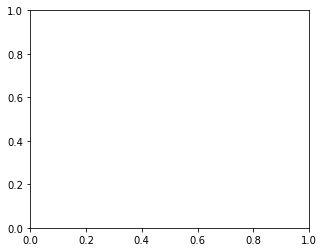

In [52]:
# afficher du resultat
plt.figure(figsize=(5,4))
plt.plot(k_range, k_scores)
plt.xlabel('Valeur de K pour Knn')
plt.ylabel('score pour cross_validation_StratifiedKFold')

# 1-1-b choisir les hyper-parametres du model knn avec GridSearchCV
* définir les valeurs du parametre k sur lesquels on cherche
* créer une grille de parametres
* instancier hyper_parametres

In [20]:
model = KNeighborsClassifier()
k_range = list(range(1, 31))
param_grid = dict(n_neighbors=k_range,
                  metric= ['Euclidean', 'manhattan', 'minkowski'])
gridKnn = hyper_parametres(param_grid, model)

# Affichage des meilleurs paramètres  du model knn

In [21]:
print(gridKnn.best_score_)
print(gridKnn.best_params_)
print(gridKnn.best_estimator_)

0.6075534660370083
{'metric': 'minkowski', 'n_neighbors': 9}
KNeighborsClassifier(n_neighbors=9)


# Evaluation du model Knn avec les meilleurs hyper-paramètres


              precision    recall  f1-score   support

           0       0.95      0.97      0.96      1130
           1       0.70      0.53      0.61       135

    accuracy                           0.93      1265
   macro avg       0.82      0.75      0.78      1265
weighted avg       0.92      0.93      0.92      1265



array([0, 0, 0, ..., 0, 0, 0])

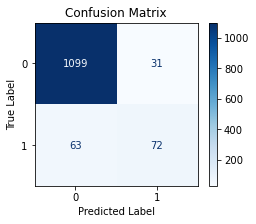

In [37]:
model = gridKnn.best_estimator_
evaluation(model)

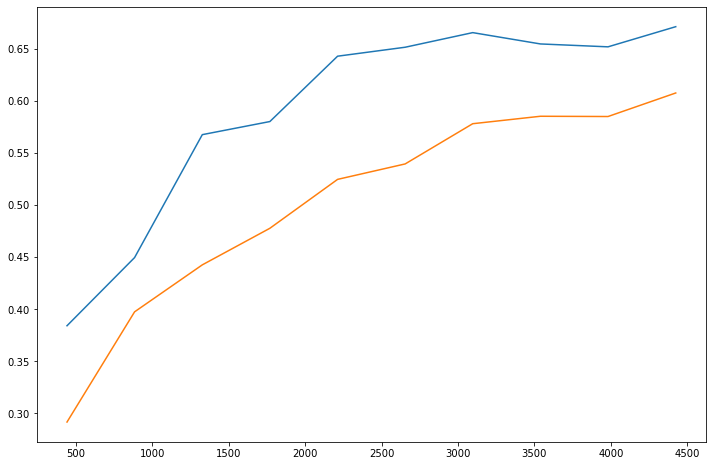

In [39]:
N, train_score, val_score = learning_curve(model, X_train, y_train, 
                                               cv=StratifiedKFold(8), scoring='f1', 
                                               train_sizes =np.linspace(0.1, 1, 10))
plt.figure(figsize=(12,8))
plt.plot(N, train_score.mean(axis=1), label='train score')
plt.plot(N, val_score.mean(axis=1), label='validation score')

# 2- Model SVM

# 2-1 choisir les hyper-parametres du model SVM avec GridSearchCV
* créer une grille de parametres
* instancier hyper_parametres

In [40]:
param_grid = {'C': [0.1, 1, 10, 100, 1000],  
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel': ['rbf','linear']
             }  
model = SVC()
gridSvm = hyper_parametres(param_grid, model)



# 2-2 Affichage des meilleurs paramètres  du model SVM

In [41]:
print(gridSvm.best_score_)
print(gridSvm.best_params_)
print(gridSvm.best_estimator_)

0.6830077008354049
{'C': 1000, 'gamma': 0.01, 'kernel': 'rbf'}
SVC(C=1000, gamma=0.01)


# 2-3 Evaluation du model svm avec les meilleurs hyper-paramètres


              precision    recall  f1-score   support

           0       0.96      0.98      0.97      1130
           1       0.78      0.68      0.73       135

    accuracy                           0.95      1265
   macro avg       0.87      0.83      0.85      1265
weighted avg       0.94      0.95      0.94      1265



array([0, 0, 0, ..., 0, 0, 0])

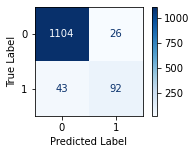

In [55]:
model = gridSvm.best_estimator_
evaluation(model)

# 3-Model arbre de decision

# 3-1 choisir les hyper-parametres du model  avec GridSearchCV
* créer une grille de parametres
* instancier hyper_parametres

In [93]:
model = DecisionTreeClassifier()
# defining parameter range 
param_grid = {'criterion':['gini','entropy'],
              'max_depth': np.arange(3, 20),
              'min_samples_split' : np.arange(1, 20),
              'splitter' : ['best', 'random']
       }  
grid = hyper_parametres(param_grid, model)

# 3-2  Affichage des meilleurs paramètres  du model DecisionTreeClassifier

In [94]:
print(grid.best_score_)
print(grid.best_params_)
print(grid.best_estimator_)

0.678944169562878
{'criterion': 'entropy', 'max_depth': 4, 'min_samples_split': 2, 'splitter': 'best'}
DecisionTreeClassifier(criterion='entropy', max_depth=4)


# 3-3 Evaluation du model avec les meilleurs hyper-paramètres

[[1100   30]
 [  45   90]]
              precision    recall  f1-score   support

           0       0.96      0.97      0.97      1130
           1       0.75      0.67      0.71       135

    accuracy                           0.94      1265
   macro avg       0.86      0.82      0.84      1265
weighted avg       0.94      0.94      0.94      1265



array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

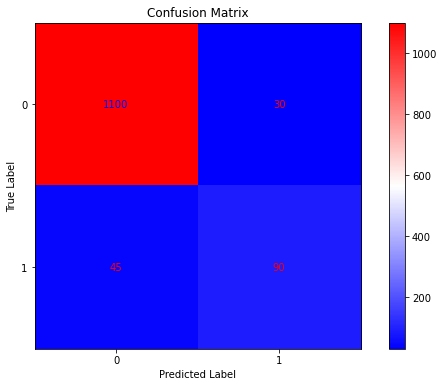

In [95]:
model = grid.best_estimator_
evaluation(model)